# TD model
@knowblesse 2023

## Load packages

In [1]:
import numpy as np
import matplotlib.pyplot as plt

## Setup model param

In [2]:
param_c = 0.08
param_gamma = 0.95
param_beta = 0.875

## Set session schedule (trial)
- First column = CS A
- Second column = CS B
- Third column = US

ex. [1, 0, 1] -> CSA+
ex. [1, 1, 1] -> CSAB+
ex. [1, 0, 0] -> CSA-
ex. np.tile(np.array([[1,0,0]]), (10, 1)) -> 10 trials with CSA+

In [3]:
schedule = np.tile(np.array([[1,0,0]]), (30, 1)) 
num_trial = schedule.shape[0]
print(f'Total Trial : {num_trial}')

Total Trial : 30


## Set trial info

In [4]:
CS_A_start = 0
CS_A_end = 10
CS_B_start = 0
CS_B_end = 10
ITI_length = 30
US_start = 8
US_end = 10
US_weight = 1
length_of_trial_timestep = np.max([CS_A_end, CS_B_end]) + ITI_length
print(f'Total Timestep of each trial : {length_of_trial_timestep}')

Total Timestep of each trial : 40


## Make new schedule (timestep)

In [5]:
new_schedule = np.zeros((num_trial * length_of_trial_timestep, 4))
for trial in range(num_trial):
    new_schedule[length_of_trial_timestep*trial + CS_A_start:length_of_trial_timestep*trial + CS_A_end, 0] = 1
    new_schedule[length_of_trial_timestep*trial + CS_B_start:length_of_trial_timestep*trial + CS_B_end, 1] = 1
    new_schedule[length_of_trial_timestep*trial + US_start:length_of_trial_timestep*trial + US_end, 2] = 1

## Initialize

In [6]:
total_time = length_of_trial_timestep * num_trial
y = np.zeros(total_time)
r = np.zeros(total_time)
x_bar = np.zeros((total_time,2))
x = np.zeros((total_time,2))
w = np.zeros((total_time,2))


## Run

In [7]:
for timestep in range(total_time-1):
    US_presence = new_schedule[timestep, 2]
    x[timestep, :] = new_schedule[timestep, 0:2]
    r[timestep] = US_weight * US_presence
    y[timestep] = r[timestep] + np.max([w[timestep, :] * x[timestep, :]])
    
    if timestep == 1:  # first trial
        x_bar[timestep, :] = 0  # eligibility traces
        w[timestep + 1, :] = w[timestep, :] + param_c * (r[timestep] + param_gamma * np.max([w[timestep, :] * x[timestep, :]])) * x_bar[timestep, :]
    else:
        x_bar[timestep,:] = param_beta * x_bar[timestep-1,:] + (1 - param_beta) * x[timestep - 1,:]  # eligibility traces
        w[timestep + 1, :] = w[timestep, :] + param_c * (r[timestep] + param_gamma * np.max([w[timestep, :] * x[timestep, :]]) - np.max([w[timestep, :] * x[timestep - 1, :]]))* x_bar[timestep,:]

## One Trial Output

Text(0.5, 0, 'timestep')

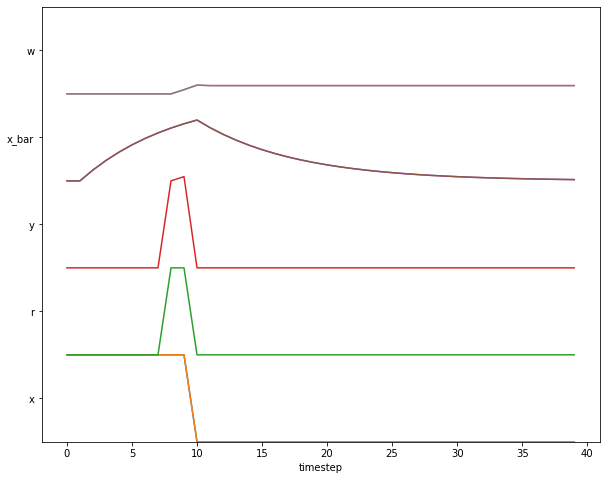

In [8]:
fig = plt.figure(figsize=(10,8))
ax1 = fig.subplots(1)
ax1.plot(x[:length_of_trial_timestep,:])
ax1.plot(r[:length_of_trial_timestep] + 1)
ax1.plot(y[:length_of_trial_timestep] + 2)
ax1.plot(x_bar[:length_of_trial_timestep, :] + 3 )
ax1.plot(w[:length_of_trial_timestep, :] + 4 )
ax1.set_ylim(0,5)
ax1.set_yticks(np.arange(0.5, 5.5, 1), ['x', 'r', 'y', 'x_bar', 'w'])
ax1.set_xlabel('timestep')

## Overall Output

Text(0.5, 0, 'Trials')

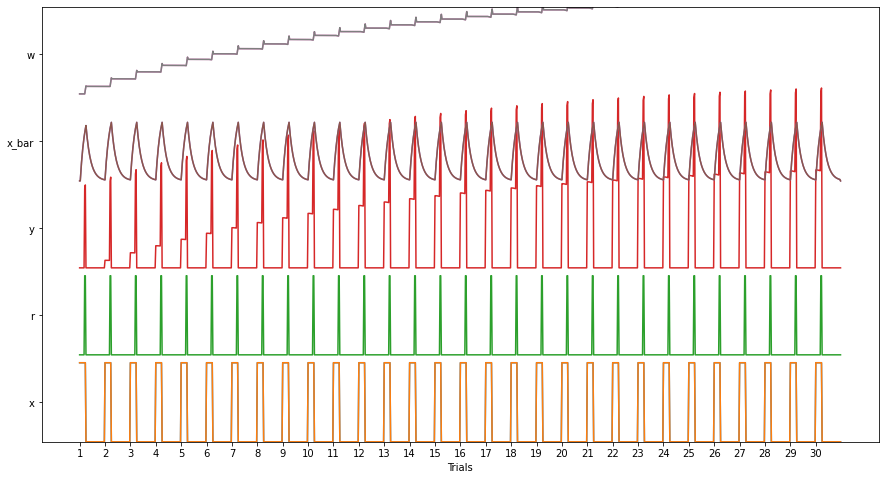

In [9]:
fig = plt.figure(figsize=(15,8))
ax2 = fig.subplots(1)
ax2.plot(x)
ax2.plot(r + 1.1)
ax2.plot(y + 2.2)
ax2.plot(x_bar + 3.3 )
ax2.plot(w + 4.4)
ax2.set_ylim(0,5.5)
ax2.set_yticks(np.arange(0.5, 5.5, 1.1), ['x', 'r', 'y', 'x_bar', 'w'])
ax2.set_xticks(np.arange(0, total_time, length_of_trial_timestep), np.arange(1, num_trial+1))
ax2.set_xlabel('Trials')

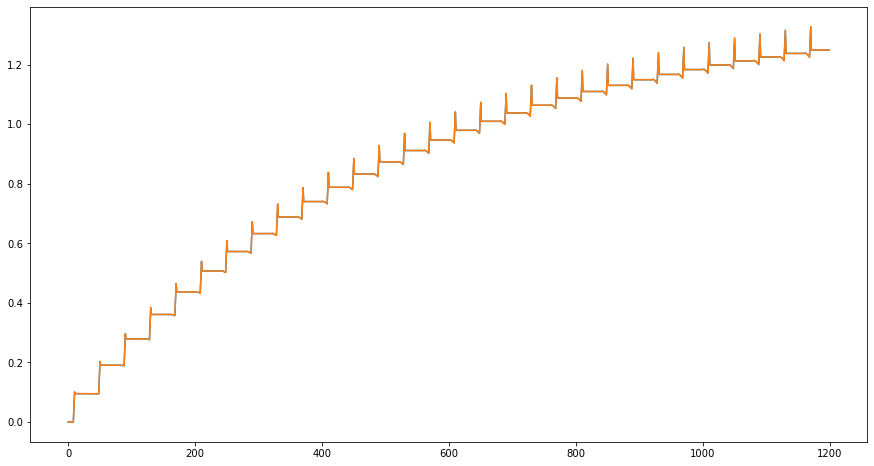

In [10]:
fig = plt.figure(figsize=(15,8))
ax2 = fig.subplots(1)
ax2.plot(w)